<a href="https://colab.research.google.com/github/dibyanshu2305/Deep_learning_course_notebooks/blob/main/CIFAR_CNN_Pytorch__final_moodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN on CIFAR DATASET-**

## Prerequisites-

**Importing the libraries-**

In [ ]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

##Downloading the data-

In [ ]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]))
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]))

##The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


In [ ]:
print(len(cifar_trainset))
print(len(cifar_testset))

In [ ]:
classes = cifar_trainset.classes 
print('Number of Classes:', len(classes))
print('Class Names :\n', classes)

In [ ]:
#shape of the image tensor
img, label = cifar_trainset[64]
img_shape = img.shape
img_shape

In [ ]:
print("Max & Min Pixel Values:", "Max:", torch.max(img), "Min:", torch.min(img))
print("Pixel Values for all Channels:\n", img[:, :, :])

##Splitting the data into test, train and validation dataset-

In [ ]:
cifar_trainset, cifar_valset = torch.utils.data.random_split(cifar_trainset, [int(0.8 * len(cifar_trainset)), int(0.2 * len(cifar_trainset))])

In [ ]:
len(cifar_trainset)

In [ ]:
len(cifar_valset)

In [ ]:
len(cifar_testset)

**Shuffling and creating batches of data-**

In [ ]:
train_dataloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=256, shuffle=True,num_workers=2)
val_dataloader = torch.utils.data.DataLoader(cifar_valset, batch_size=256, shuffle=False,num_workers=2)
test_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=256, shuffle=False,num_workers=2)

In [ ]:
print("Training dataset size: ", len(cifar_trainset))
print("Validation dataset size: ", len(cifar_valset))
print("Testing dataset size: ", len(cifar_testset))

In [ ]:
print("No. of batches in Training dataset : ", len(train_dataloader))
print("No. of batches in Validation dataset : ", len(val_dataloader))
print("No. of batches in Testing dataset : ", len(test_dataloader))

**Visualising the data-**

In [ ]:
img, label = cifar_trainset[60]
img[0] = img[0] * 0.2023 + 0.4914
img[1] = img[1] * 0.1994 + 0.4822
img[2] = img[2] * 0.2010 + 0.4465
plt.imshow(img.permute((1,2,0)))
plt.show()
print('Label as Number:', label)
print('Label as Name:', classes[label])

In [ ]:
for i in range(6):
  img, label = cifar_trainset[ i +64]
  img[0] = img[0] * 0.2023 + 0.4914
  img[1] = img[1] * 0.1994 + 0.4822
  img[2] = img[2] * 0.2010 + 0.4465
  plt.imshow(img.permute((1,2,0)))
  plt.show()
  print('Label as Number:', label)
  print('Label as Name:', classes[label])

In [ ]:
for images, _ in train_dataloader:
    images[0] = images[0] * 0.2023 + 0.4914
    images[1] = images[1] * 0.1994 + 0.4822
    images[2] = images[2] * 0.2010 + 0.4465 
    print('Shape of an Image (Batch Size, RGB, Pixels):', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0))) # we need permute here because matplotlib wants to have the channels as the last dimension
    break

In [ ]:
def TabularFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)
  return pd.DataFrame(list(zip(ep,train_cost,train_acc,eval_cost,eval_acc)),columns = ['Epoch Value','Training Loss','Training Accuracy','Validation loss','Validation Accuracy'])

In [ ]:
def GraphicalFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)

  plt.figure(figsize =(12,7))
  plt.plot(ep,eval_cost,label = "Evaluation Loss")
  plt.plot(ep,train_cost,label = "Training Loss")
  plt.ylabel("Loss",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between value of Trainig and Validation Loss V/s Epochs",fontsize = 15)
  plt.show()
  print("\n\n__________________________________________________\n\n")
  plt.figure(figsize =(12,7))
  plt.plot(ep,train_acc,label = "Training Accuracy")
  plt.plot(ep,eval_acc,label = "Evaluation Accuracy")
  plt.ylabel("Accuracy",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between Trainig and Validation Accuracies V/s Epochs",fontsize = 15)
  plt.show()

##**Defining the CNN-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv_4 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(4 * 4 * 256, 512)
        self.linear_2 = torch.nn.Linear(512, 128)
        self.linear_3 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        # x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_3(x)
        x = self.max_pool2d(x)
        x = self.conv_4(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear_2(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_3(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

## **Training-**

In [ ]:
num_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0
for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        _, predicted = torch.max(pred, 1)
        total_train += label.size(0)
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        _, predicted = torch.max(pred, 1)
        total_val += label.size(0)
        correct_val += (predicted == label).sum().item() 
        # print("correct test = ",correct_val) 
        # print(itr+1, "Test Batch complete")     
      


    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**We can see that the model has been overfitted.**

**To reduce overfitting, the very first step we will do is to reduce the model complexity-**

## **Reducing Overfitting-**

### **1st Attempt-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv_3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        # self.conv_4 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(4 * 4 * 128, 128)
        # self.linear_2 = torch.nn.Linear(512, 128)
        self.linear_3 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.00)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_3(x)
        x = self.max_pool2d(x)
        # x = self.conv_4(x)
        # x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        # x = self.linear_2(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        pred = self.linear_3(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9, weight_decay=0)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

In [ ]:
num_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0
for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        _, predicted = torch.max(pred, 1)
        total_train += label.size(0)
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        _, predicted = torch.max(pred, 1)
        total_val += label.size(0)
        correct_val += (predicted == label).sum().item() 
        # print("correct test = ",correct_val) 
        # print(itr+1, "Test Batch complete")     
      


    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**We observe an overfitting again, so we again reduce the complexity of the model-**

### **2nd Attempt-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # self.conv_3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        # self.conv_4 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(8 * 8 * 64, 128)
        # self.linear_2 = torch.nn.Linear(512, 128)
        self.linear_3 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        # x = self.conv_3(x)
        # x = self.max_pool2d(x)
        # x = self.conv_4(x)
        # x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        # x = self.linear_2(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        pred = self.linear_3(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9, weight_decay=0.001)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

In [ ]:
num_epochs = 50
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0
for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        _, predicted = torch.max(pred, 1)
        total_train += label.size(0)
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        _, predicted = torch.max(pred, 1)
        total_val += label.size(0)
        correct_val += (predicted == label).sum().item() 
        # print("correct test = ",correct_val) 
        # print(itr+1, "Test Batch complete")     
      


    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**Further reducing the model complexity-**

### **3rd Attempt-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.conv_2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        # self.conv_3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        # self.conv_4 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(5 * 5 * 16, 128)
        # self.linear_2 = torch.nn.Linear(512, 128)
        self.linear_3 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        # x = self.conv_3(x)
        # x = self.max_pool2d(x)
        # x = self.conv_4(x)
        # x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        # x = self.linear_2(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        pred = self.linear_3(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9, weight_decay=0.001)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

In [ ]:
num_epochs = 50
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        _, predicted = torch.max(pred, 1)
        total_train += label.size(0)
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        _, predicted = torch.max(pred, 1)
        total_val += label.size(0)
        correct_val += (predicted == label).sum().item() 

    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**Increasing the epochs further-**

In [ ]:
num_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        _, predicted = torch.max(pred, 1)
        total_train += label.size(0)
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        _, predicted = torch.max(pred, 1)
        total_val += label.size(0)
        correct_val += (predicted == label).sum().item() 

    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**We observe that we are unable to reduce overfitting after a level, so we try something else-**

### **Decreasing the batch size-**

In [ ]:
train_dataloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=16, shuffle=True,num_workers=2)
val_dataloader = torch.utils.data.DataLoader(cifar_valset, batch_size=16, shuffle=False,num_workers=2)
test_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=16, shuffle=False,num_workers=2)

In [ ]:
num_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        _, predicted = torch.max(pred, 1)
        total_train += label.size(0)
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        _, predicted = torch.max(pred, 1)
        total_val += label.size(0)
        correct_val += (predicted == label).sum().item() 

    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**Looks like the extent of overfitting has been reduced a little, but the validation accuracy is stuck at around $65\%$.**

#**Data Augmentation-**

### **Prerequisites-**

In [ ]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.optim.lr_scheduler as lr_scheduler

In [ ]:
cifar_trainset_transformed = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose([transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
                                                                                                          transforms.RandomHorizontalFlip(),
                                                                                                          transforms.RandomInvert(),
                                                                                                          transforms.RandomVerticalFlip(),
                                                                                                          # transforms.RandomRotate(),
                                                                                                          # transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                                                                                                          # transforms.RandomSolarize(0.3),
                                                                                                          transforms.ToTensor(),
                                                                                                          transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]))
# cifar_testset_transformed = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]))

### **Increasing the dataset-**

In [ ]:
cifar_trainset = cifar_trainset + cifar_trainset_transformed

In [ ]:
print(len(cifar_trainset))
print(len(cifar_testset))
print(len(cifar_valset))

In [ ]:
train_dataloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=256, shuffle=True,num_workers=2)
val_dataloader = torch.utils.data.DataLoader(cifar_valset, batch_size=256, shuffle=False,num_workers=2)
test_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=256, shuffle=False,num_workers=2)

In [ ]:
print("Training dataset size: ", len(cifar_trainset))
print("Validation dataset size: ", len(cifar_valset))
print("Testing dataset size: ", len(cifar_testset))

In [ ]:
print("No. of batches in Training dataset : ", len(train_dataloader))
print("No. of batches in Validation dataset : ", len(val_dataloader))
print("No. of batches in Testing dataset : ", len(test_dataloader))

In [ ]:
img, label = cifar_trainset[60]
img = img/2 + 0.5
plt.imshow(img.permute((1,2,0)))
plt.show()
print('Label as Number:', label)
print('Label as Name:', classes[label])

In [ ]:
for i in range(6):
  img, label = cifar_trainset[ i +64]
  img = img/2 + 0.5 #why again denormalize?
  plt.imshow(img.permute((1,2,0)))
  plt.show()
  print('Label as Number:', label)
  print('Label as Name:', classes[label])

In [ ]:
for images, _ in train_dataloader:
    images = images /2 + 0.5 
    print('Shape of an Image (Batch Size, RGB, Pixels):', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0))) # we need permute here because matplotlib wants to have the channels as the last dimension
    break

### **Training the same model after increasing the size of data and using learning rate scheduler-**

**Adding Multistep LR-**

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.conv_2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        # self.conv_3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        # self.conv_4 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(5 * 5 * 16, 128)
        # self.linear_2 = torch.nn.Linear(512, 128)
        self.linear_3 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        # x = self.conv_3(x)
        # x = self.max_pool2d(x)
        # x = self.conv_4(x)
        # x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        # x = self.linear_2(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        pred = self.linear_3(x)

        return pred

#Initialising the model
model = Model()
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9, weight_decay=0.001)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones = [35,55,80], gamma=0.1, last_epoch=- 1, verbose=True)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

if (torch.cuda.is_available()):
    model.cuda()

In [ ]:
num_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        _, predicted = torch.max(pred, 1)
        total_train += label.size(0)
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    lr_scheduler.step() 
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        _, predicted = torch.max(pred, 1)
        total_val += label.size(0)
        correct_val += (predicted == label).sum().item() 

    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
import pandas as pd
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

# **RESNET-18 Architecture-**

## **Basic RESNET-18 with Data Augmentation-**

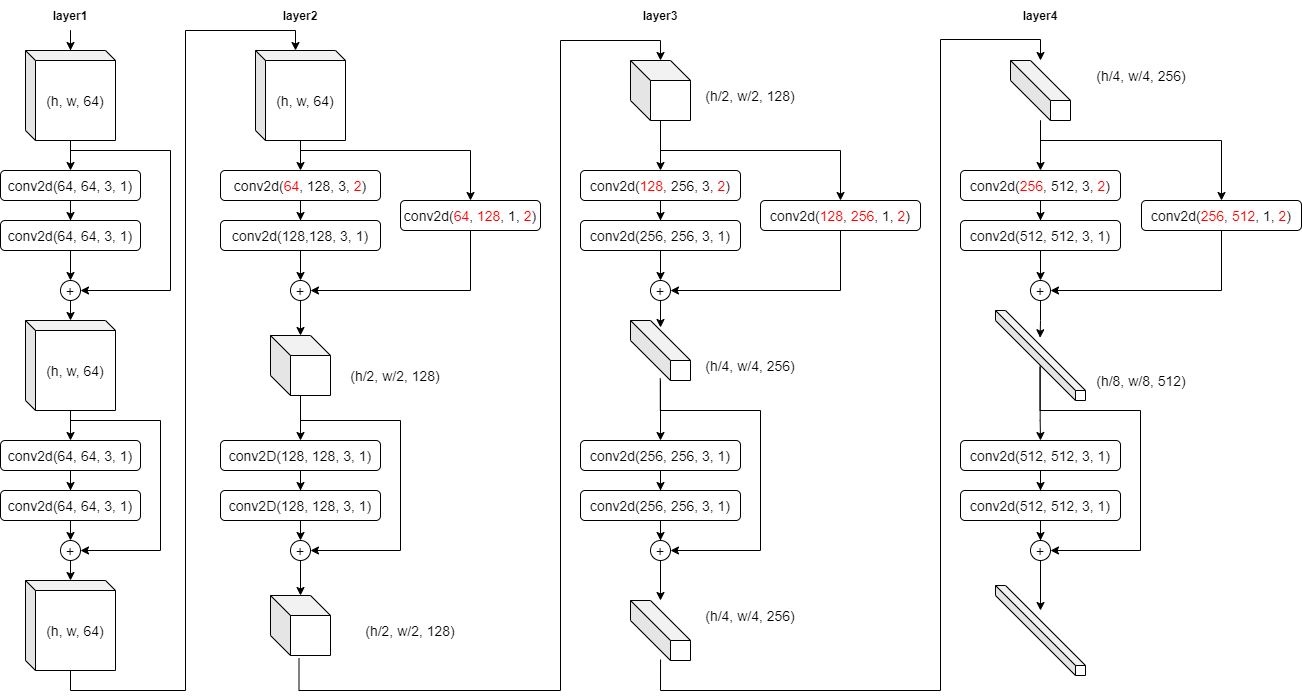

In [ ]:
# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

    
# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

#Initialising the model
model = ResNet(ResidualBlock, [2, 2, 2])
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9, weight_decay=0.001)

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

if (torch.cuda.is_available()):
    model.cuda()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

In [ ]:
num_epochs = 100
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        
        _, predicted = torch.max(pred, 1)
        total_train += label.shape[0]
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()
        
        _, predicted = torch.max(pred, 1)
        total_val += label.shape[0]
        correct_val += (predicted == label).sum().item() 

    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
import pandas as pd
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

## **What if we dont do Data Augmentation on RESNET-18 ?**

In [ ]:
# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

    
# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

#Initialising the model
model = ResNet(ResidualBlock, [2, 2, 2])
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9, weight_decay=0.001)

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

if (torch.cuda.is_available()):
    model.cuda()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

In [ ]:
num_epochs = 40
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        
        _, predicted = torch.max(pred, 1)
        total_train += label.shape[0]
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()
        
        _, predicted = torch.max(pred, 1)
        total_val += label.shape[0]
        correct_val += (predicted == label).sum().item() 

    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

In [ ]:
import pandas as pd
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

**Without data augmentation, we can see that there is overfitting in the model.**

**So, we will be proceeding forward with data augmentation-**

## **Again training the model, with data augmentation, and increasing the number of features-**



In [ ]:
# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

    
# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 64, layers[0])
        self.layer2 = self.make_layer(block, 128, layers[1], 2)
        self.layer3 = self.make_layer(block, 256, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

#Initialising the model
model_best = ResNet(ResidualBlock, [2, 2, 2])
print("The overall model is - \n")
print(model_best)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_best.parameters(), lr=0.01,momentum=0.9, weight_decay=0.001)

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_best.state_dict():
    print(param_tensor, "\t", model_best.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

if (torch.cuda.is_available()):
    model_best.cuda()

def count_parameters(model_best):
    return sum(p.numel() for p in model_best.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model_best):,} trainable parameters')

In [ ]:
num_epochs = 150
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model_best.train()
    total_p = 0
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model_best(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()
        #ADDED HERE
        
        _, predicted = torch.max(pred, 1)
        total_train += label.shape[0]
        correct_train += (predicted == label).sum().item() 
        # print("correct train = ",correct_train)      

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")
    accuracy_train = (100 * correct_train) / total_train
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    

    # validation
    model_best.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model_best(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()
        
        _, predicted = torch.max(pred, 1)
        total_val += label.shape[0]
        correct_val += (predicted == label).sum().item() 

    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model_best.state_dict(), "model_best.dth")

In [ ]:
import pandas as pd
pd = TabularFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)
pd

In [ ]:
GraphicalFormat(num_epochs,train_loss,train_accuracy,val_loss,val_accuracy)

# **Evaluating the model-**

In [ ]:
total_val_loss = 0
# validation
#model_best = ResNet(ResidualBlock, [2, 2, 2])
model_best = ResNet(ResidualBlock, [2, 2, 2])


model_best.load_state_dict(torch.load('model.dth'))
model_best.eval()
total_val = 0
correct_val = 0
for itr, (image, label) in enumerate(test_dataloader):

    if (torch.cuda.is_available()):
        image = image.cuda()
        label = label.cuda()

    pred = model_best(image)

    loss = criterion(pred, label)
    total_val_loss += loss.item()
    
    _, predicted = torch.max(pred, 1)
    total_val += label.shape[0]
    correct_val += (predicted == label).sum().item() 

accuracy = (100 * correct_val) / total_val
val_accuracy.append(accuracy)

total_val_loss = total_val_loss / (itr + 1)
val_loss.append(total_val_loss)
print('\n Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format( total_val_loss, accuracy))